In [36]:
import pandas as pd
import calendar
import seaborn as sns
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt

# Project supermarket simulation

1. Read and clean the data
2. Data exploration
3. calculate propabilities
4. Define classes
5. Run Simulation


## 1) Read and clean the data

In [18]:
monday = pd.read_csv('data/monday.csv', sep=';')
tuesday = pd.read_csv('data/tuesday.csv', sep=';')
wednesday = pd.read_csv('data/wednesday.csv', sep=';')
thursday = pd.read_csv('data/thursday.csv', sep=';')
friday = pd.read_csv('data/friday.csv', sep=';')


In [19]:
customer_state = pd.concat([monday, tuesday, wednesday, thursday, friday])
customer_state['timestamp']=pd.to_datetime(customer_state['timestamp'])
customer_state

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy
5121,2019-09-06 21:50:00,1507,checkout
5122,2019-09-06 21:50:00,1508,checkout
5123,2019-09-06 21:50:00,1509,drinks


In [20]:
customer_state.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
dtype: object

In [21]:
customer_state["weekday"] = customer_state["timestamp"].dt.day_name()
customer_state["hour"] = customer_state["timestamp"].dt.hour
customer_state

,timestamp,customer_no,location,weekday,hour
0,2019-09-02 07:03:00,1,dairy,Monday,7
1,2019-09-02 07:03:00,2,dairy,Monday,7
2,2019-09-02 07:04:00,3,dairy,Monday,7
3,2019-09-02 07:04:00,4,dairy,Monday,7
4,2019-09-02 07:04:00,5,spices,Monday,7
...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,Friday,21
5121,2019-09-06 21:50:00,1507,checkout,Friday,21
5122,2019-09-06 21:50:00,1508,checkout,Friday,21
5123,2019-09-06 21:50:00,1509,drinks,Friday,21


### Calculate Customer ID

In [22]:
customer_state['customer_id'] = customer_state['weekday'] + "_" + customer_state['customer_no'].astype(str)
customer_state

,timestamp,customer_no,location,weekday,hour,customer_id
0,2019-09-02 07:03:00,1,dairy,Monday,7,Monday_1
1,2019-09-02 07:03:00,2,dairy,Monday,7,Monday_2
2,2019-09-02 07:04:00,3,dairy,Monday,7,Monday_3
3,2019-09-02 07:04:00,4,dairy,Monday,7,Monday_4
4,2019-09-02 07:04:00,5,spices,Monday,7,Monday_5
...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,Friday,21,Friday_1500
5121,2019-09-06 21:50:00,1507,checkout,Friday,21,Friday_1507
5122,2019-09-06 21:50:00,1508,checkout,Friday,21,Friday_1508
5123,2019-09-06 21:50:00,1509,drinks,Friday,21,Friday_1509


In [24]:
customer_state=customer_state.set_index('timestamp')
customer_state

,customer_no,location,weekday,hour,customer_id
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,Monday,7,Monday_1
2019-09-02 07:03:00,2,dairy,Monday,7,Monday_2
2019-09-02 07:04:00,3,dairy,Monday,7,Monday_3
2019-09-02 07:04:00,4,dairy,Monday,7,Monday_4
2019-09-02 07:04:00,5,spices,Monday,7,Monday_5
...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,Friday,21,Friday_1500
2019-09-06 21:50:00,1507,checkout,Friday,21,Friday_1507
2019-09-06 21:50:00,1508,checkout,Friday,21,Friday_1508


### Determine order of shopping 

In [25]:
first_time = customer_state.reset_index().groupby('customer_id')['timestamp'].min()
first_time

customer_id
Friday_1        2019-09-06 07:00:00
Friday_10       2019-09-06 07:06:00
Friday_100      2019-09-06 08:03:00
Friday_1000     2019-09-06 17:19:00
Friday_1001     2019-09-06 17:19:00
                        ...        
Wednesday_995   2019-09-04 16:52:00
Wednesday_996   2019-09-04 16:52:00
Wednesday_997   2019-09-04 16:52:00
Wednesday_998   2019-09-04 16:53:00
Wednesday_999   2019-09-04 16:53:00
Name: timestamp, Length: 7445, dtype: datetime64[ns]

In [80]:
# fill column order for all instances where customer first enters the market (first state)
for customer in customer_state['customer_id'].unique():
    customer_state.loc[(customer_state.customer_id == customer) & (customer_state.index == first_time[customer]), 'order'] = 'first'

# fill column order for checkout instances
for i in range(len(customer_state)): 
    if customer_state["location"][i] == "checkout": 
        customer_state["order"][i]="checkout"

# fill column order n/a with 'following' 
customer_state=customer_state.fillna(value={'order': 'following'})
customer_state

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,customer_no,location,weekday,hour,customer_id,order
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,Monday,7,Monday_1,first
2019-09-02 07:03:00,2,dairy,Monday,7,Monday_2,first
2019-09-02 07:04:00,3,dairy,Monday,7,Monday_3,first
2019-09-02 07:04:00,4,dairy,Monday,7,Monday_4,first
2019-09-02 07:04:00,5,spices,Monday,7,Monday_5,first
...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,Friday,21,Friday_1500,following
2019-09-06 21:50:00,1507,checkout,Friday,21,Friday_1507,checkout
2019-09-06 21:50:00,1508,checkout,Friday,21,Friday_1508,checkout


### Determine duration in each state/ aisle

In [ ]:
# analyse on individual days
# shift timestamp and location for each day
# timestamp - timestamp shifted
# timedelta (look up pandas)

In [136]:
customer_state_shift = customer_state.reset_index().sort_values(by=['customer_id'])
customer_state_shift

,timestamp,customer_no,location,weekday,hour,customer_id,order
19752,2019-09-06 07:00:00,1,dairy,Friday,7,Friday_1,first
19764,2019-09-06 07:04:00,1,spices,Friday,7,Friday_1,following
19767,2019-09-06 07:05:00,1,checkout,Friday,7,Friday_1,checkout
19771,2019-09-06 07:06:00,10,fruit,Friday,7,Friday_10,first
19792,2019-09-06 07:11:00,10,checkout,Friday,7,Friday_10,checkout
...,...,...,...,...,...,...,...
12892,2019-09-04 16:59:00,998,checkout,Wednesday,16,Wednesday_998,checkout
12856,2019-09-04 16:53:00,998,dairy,Wednesday,16,Wednesday_998,first
12884,2019-09-04 16:57:00,998,fruit,Wednesday,16,Wednesday_998,following
12864,2019-09-04 16:54:00,999,checkout,Wednesday,16,Wednesday_999,checkout


In [137]:
customer_state_shift['shift_timestamp'] = customer_state_shift['timestamp'].shift(-1)
customer_state_shift

,timestamp,customer_no,location,weekday,hour,customer_id,order,shift_timestamp
19752,2019-09-06 07:00:00,1,dairy,Friday,7,Friday_1,first,2019-09-06 07:04:00
19764,2019-09-06 07:04:00,1,spices,Friday,7,Friday_1,following,2019-09-06 07:05:00
19767,2019-09-06 07:05:00,1,checkout,Friday,7,Friday_1,checkout,2019-09-06 07:06:00
19771,2019-09-06 07:06:00,10,fruit,Friday,7,Friday_10,first,2019-09-06 07:11:00
19792,2019-09-06 07:11:00,10,checkout,Friday,7,Friday_10,checkout,2019-09-06 08:04:00
...,...,...,...,...,...,...,...,...
12892,2019-09-04 16:59:00,998,checkout,Wednesday,16,Wednesday_998,checkout,2019-09-04 16:53:00
12856,2019-09-04 16:53:00,998,dairy,Wednesday,16,Wednesday_998,first,2019-09-04 16:57:00
12884,2019-09-04 16:57:00,998,fruit,Wednesday,16,Wednesday_998,following,2019-09-04 16:54:00
12864,2019-09-04 16:54:00,999,checkout,Wednesday,16,Wednesday_999,checkout,2019-09-04 16:53:00


In [138]:
customer_state_shift['timedelta']=customer_state_shift['shift_timestamp']-customer_state_shift['timestamp']
customer_state_shift

,timestamp,customer_no,location,weekday,hour,customer_id,order,shift_timestamp,timedelta
19752,2019-09-06 07:00:00,1,dairy,Friday,7,Friday_1,first,2019-09-06 07:04:00,00:04:00
19764,2019-09-06 07:04:00,1,spices,Friday,7,Friday_1,following,2019-09-06 07:05:00,00:01:00
19767,2019-09-06 07:05:00,1,checkout,Friday,7,Friday_1,checkout,2019-09-06 07:06:00,00:01:00
19771,2019-09-06 07:06:00,10,fruit,Friday,7,Friday_10,first,2019-09-06 07:11:00,00:05:00
19792,2019-09-06 07:11:00,10,checkout,Friday,7,Friday_10,checkout,2019-09-06 08:04:00,00:53:00
...,...,...,...,...,...,...,...,...,...
12892,2019-09-04 16:59:00,998,checkout,Wednesday,16,Wednesday_998,checkout,2019-09-04 16:53:00,-1 days +23:54:00
12856,2019-09-04 16:53:00,998,dairy,Wednesday,16,Wednesday_998,first,2019-09-04 16:57:00,00:04:00
12884,2019-09-04 16:57:00,998,fruit,Wednesday,16,Wednesday_998,following,2019-09-04 16:54:00,-1 days +23:57:00
12864,2019-09-04 16:54:00,999,checkout,Wednesday,16,Wednesday_999,checkout,2019-09-04 16:53:00,-1 days +23:59:00


In [196]:
null_time = pd.Timedelta('0 days 00:00:00')
extra_time = pd.Timedelta('0 days 03:59:00')

type(null_time)

pandas._libs.tslibs.timedeltas.Timedelta

In [140]:
for i in range(len(customer_state_shift)):
    if customer_state_shift['timedelta'][i] < null_time:
        customer_state_shift['timedelta'][i] = 'Null'
    elif customer_state_shift['timedelta'][i] > extra_time:
        customer_state_shift['timedelta'][i] = 'Null'
customer_state_shift

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

,timestamp,customer_no,location,weekday,hour,customer_id,order,shift_timestamp,timedelta
19752,2019-09-06 07:00:00,1,dairy,Friday,7,Friday_1,first,2019-09-06 07:04:00,0 days 00:04:00
19764,2019-09-06 07:04:00,1,spices,Friday,7,Friday_1,following,2019-09-06 07:05:00,0 days 00:01:00
19767,2019-09-06 07:05:00,1,checkout,Friday,7,Friday_1,checkout,2019-09-06 07:06:00,0 days 00:01:00
19771,2019-09-06 07:06:00,10,fruit,Friday,7,Friday_10,first,2019-09-06 07:11:00,0 days 00:05:00
19792,2019-09-06 07:11:00,10,checkout,Friday,7,Friday_10,checkout,2019-09-06 08:04:00,0 days 00:53:00
...,...,...,...,...,...,...,...,...,...
12892,2019-09-04 16:59:00,998,checkout,Wednesday,16,Wednesday_998,checkout,2019-09-04 16:53:00,Null
12856,2019-09-04 16:53:00,998,dairy,Wednesday,16,Wednesday_998,first,2019-09-04 16:57:00,0 days 00:04:00
12884,2019-09-04 16:57:00,998,fruit,Wednesday,16,Wednesday_998,following,2019-09-04 16:54:00,Null
12864,2019-09-04 16:54:00,999,checkout,Wednesday,16,Wednesday_999,checkout,2019-09-04 16:53:00,Null


In [176]:
customer_state_shift['timedelta_minutes'] = ""
customer_state_shift

,timestamp,customer_no,location,weekday,hour,customer_id,order,shift_timestamp,timedelta,timedelta_minutes
19752,2019-09-06 07:00:00,1,dairy,Friday,7,Friday_1,first,2019-09-06 07:04:00,0 days 00:04:00,
19764,2019-09-06 07:04:00,1,spices,Friday,7,Friday_1,following,2019-09-06 07:05:00,0 days 00:01:00,
19767,2019-09-06 07:05:00,1,checkout,Friday,7,Friday_1,checkout,2019-09-06 07:06:00,0 days 00:01:00,
19771,2019-09-06 07:06:00,10,fruit,Friday,7,Friday_10,first,2019-09-06 07:11:00,0 days 00:05:00,
19792,2019-09-06 07:11:00,10,checkout,Friday,7,Friday_10,checkout,2019-09-06 08:04:00,0 days 00:53:00,
...,...,...,...,...,...,...,...,...,...,...
12892,2019-09-04 16:59:00,998,checkout,Wednesday,16,Wednesday_998,checkout,2019-09-04 16:53:00,Null,
12856,2019-09-04 16:53:00,998,dairy,Wednesday,16,Wednesday_998,first,2019-09-04 16:57:00,0 days 00:04:00,
12884,2019-09-04 16:57:00,998,fruit,Wednesday,16,Wednesday_998,following,2019-09-04 16:54:00,Null,
12864,2019-09-04 16:54:00,999,checkout,Wednesday,16,Wednesday_999,checkout,2019-09-04 16:53:00,Null,


In [193]:
customer_state_shift['timedelta'][i] > null_time

TypeError: Cannot compare type Timedelta with type str

In [205]:
type(customer_state_shift['timedelta'][24876])

str

In [200]:
customer_state_shift2 = customer_state_shift[customer_state_shift['timedelta'].apply(lambda x: isinstance(x, Timedelta
))]
customer_state_shift2

NameError: name 'Timedelta' is not defined

In [206]:
for i in range(len(customer_state_shift)):
    if customer_state_shift['timedelta'][i] > null_time:
        customer_state_shift['timedelta_minutes'][i] = customer_state_shift['timedelta'].loc[i].total_seconds()/60
    elif customer_state_shift['timedelta'][i] != null_time:
        pass
customer_state_shift

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: Cannot compare type Timedelta with type str

In [191]:
customer_state_shift['timedelta'].loc[0].total_seconds()/60

2.0

In [184]:
customer_state_shift['timedelta'].loc[4].total_seconds()/60

1.0

## 2) Data Exploration
### 2.1 Calculate the total number of customers in each section

In [155]:
# includes all customers, is not showing unique customers
location_aggregate = pd.DataFrame(customer_state.groupby(['location'], sort=True)['customer_id'].count()).reset_index()
location_aggregate


,location,customer_id
0,checkout,7417
1,dairy,4679
2,drinks,3905
3,fruit,5122
4,spices,3754


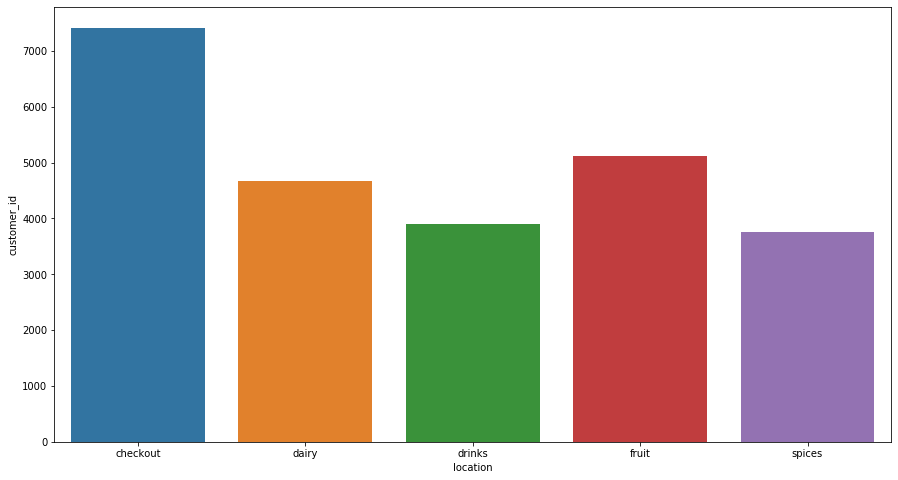

In [153]:
plt.figure(figsize=(15,8))
sns.barplot(x="location", y="customer_id", data=location_aggregate)

### 2.2 Calculate the total number of customers in each section over time (per weekday, per hour of the day)

In [157]:
location_day_aggregate = pd.DataFrame(customer_state.groupby(['location','weekday'], sort=True)['customer_id'].count()).reset_index()
location_day_aggregate

,location,weekday,customer_id
0,checkout,Friday,1502
1,checkout,Monday,1437
2,checkout,Thursday,1532
3,checkout,Tuesday,1420
4,checkout,Wednesday,1526
5,dairy,Friday,932
6,dairy,Monday,895
7,dairy,Thursday,965
8,dairy,Tuesday,911
9,dairy,Wednesday,976


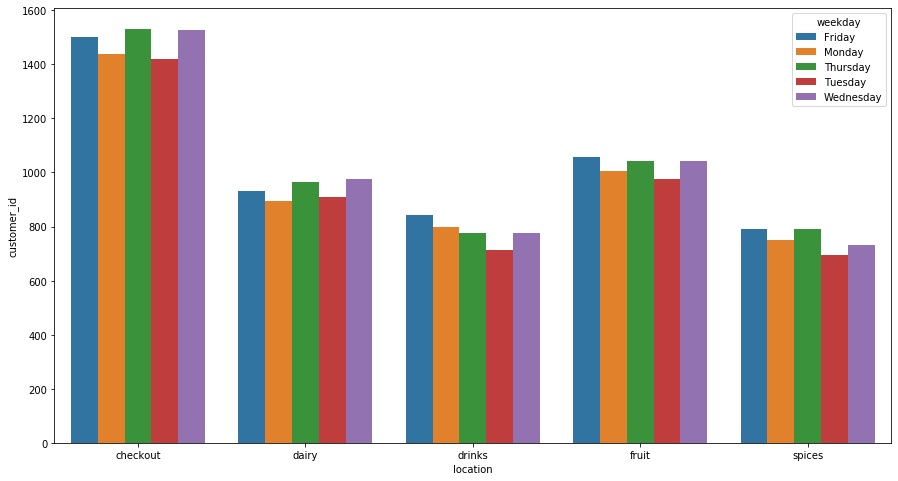

In [158]:
plt.figure(figsize=(15,8))
sns.barplot(x="location", y="customer_id",hue='weekday', data=location_day_aggregate)

In [161]:
hour_aggregate = pd.DataFrame(customer_state.groupby(['hour', 'weekday'], sort=True)['customer_id'].count()).reset_index()
hour_aggregate

,hour,weekday,customer_id
0,7,Friday,305
1,7,Monday,317
2,7,Thursday,315
3,7,Tuesday,328
4,7,Wednesday,279
...,...,...,...
70,21,Friday,181
71,21,Monday,153
72,21,Thursday,239
73,21,Tuesday,194


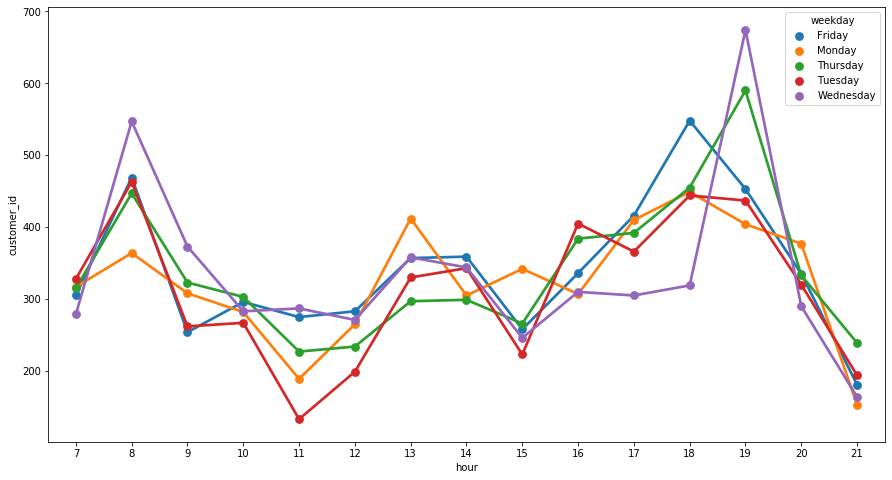

In [163]:
plt.figure(figsize=(15,8))
sns.pointplot(x=hour_aggregate['hour'], y=hour_aggregate['customer_id'], hue= hour_aggregate['weekday'],data=hour_aggregate)

### 2.3 Calculate the time each customer spent in the market (per visit average, per day average)

In [164]:
customer_state_shift.groupby('weekday')

,timestamp,customer_no,location,weekday,hour,customer_id,order,shift_timestamp,timedelta
19752,2019-09-06 07:00:00,1,dairy,Friday,7,Friday_1,first,2019-09-06 07:04:00,0 days 00:04:00
19764,2019-09-06 07:04:00,1,spices,Friday,7,Friday_1,following,2019-09-06 07:05:00,0 days 00:01:00
19767,2019-09-06 07:05:00,1,checkout,Friday,7,Friday_1,checkout,2019-09-06 07:06:00,0 days 00:01:00
19771,2019-09-06 07:06:00,10,fruit,Friday,7,Friday_10,first,2019-09-06 07:11:00,0 days 00:05:00
19792,2019-09-06 07:11:00,10,checkout,Friday,7,Friday_10,checkout,2019-09-06 08:04:00,0 days 00:53:00
...,...,...,...,...,...,...,...,...,...
12892,2019-09-04 16:59:00,998,checkout,Wednesday,16,Wednesday_998,checkout,2019-09-04 16:53:00,Null
12856,2019-09-04 16:53:00,998,dairy,Wednesday,16,Wednesday_998,first,2019-09-04 16:57:00,0 days 00:04:00
12884,2019-09-04 16:57:00,998,fruit,Wednesday,16,Wednesday_998,following,2019-09-04 16:54:00,Null
12864,2019-09-04 16:54:00,999,checkout,Wednesday,16,Wednesday_999,checkout,2019-09-04 16:53:00,Null


In [166]:
time_spend = pd.DataFrame(customer_state_shift.groupby(['weekday','timedelta'], sort=True)['timedelta'].mean()).reset_index()
time_spend


DataError: No numeric types to aggregate

In [ ]:
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds
td = datetime.timedelta(2, 7743, 12345)
hours, minutes, seconds = convert_timedelta(td)
print '{} minutes, {} hours'.format(minutes, hours)

In [167]:
extra_time = pd.Timedelta('0 days 03:59:00')

239.0

## 3) Calculate probabilities
- calculate propabilities for first state and following states
- do not use dataframe for other things (as some rows where deleted)

In [57]:
customers_in_first_sections = customer_state[customer_state.order == 'first'].groupby('location')[['customer_id']].count()
total_entries = sum(customers_in_first_sections['customer_id'].to_list())

In [58]:
first_probabilities = customers_in_first_sections / total_entries
first_probabilities

,customer_id
location,
dairy,0.287576
drinks,0.153526
fruit,0.377435
spices,0.181464


In [60]:
first_probabilities_list = first_probabilities['customer_id'].to_list().copy()
first_probabilities_list

[0.2875755540631296,
 0.15352585627938214,
 0.3774345198119543,
 0.18146406984553393]

In [32]:
crosstab = customer_state.reset_index().set_index('customer_id').sort_values(['customer_no', 'timestamp'])
crosstab

,timestamp,customer_no,location,weekday,hour,order
customer_id,,,,,,
Monday_1,2019-09-02 07:03:00,1,dairy,Monday,7,first
Monday_1,2019-09-02 07:05:00,1,checkout,Monday,7,NaN
Tuesday_1,2019-09-03 07:02:00,1,fruit,Tuesday,7,first
Tuesday_1,2019-09-03 07:05:00,1,drinks,Tuesday,7,NaN
Tuesday_1,2019-09-03 07:12:00,1,checkout,Tuesday,7,NaN
...,...,...,...,...,...,...
Thursday_1533,2019-09-05 21:48:00,1533,dairy,Thursday,21,first
Thursday_1534,2019-09-05 21:48:00,1534,fruit,Thursday,21,first
Thursday_1534,2019-09-05 21:49:00,1534,checkout,Thursday,21,NaN


In [33]:
crosstab['new_location'] = crosstab['location'].shift(-1)
crosstab = crosstab[crosstab['location'] != 'checkout'].copy()
crosstab

,timestamp,customer_no,location,weekday,hour,order,new_location
customer_id,,,,,,,
Monday_1,2019-09-02 07:03:00,1,dairy,Monday,7,first,checkout
Tuesday_1,2019-09-03 07:02:00,1,fruit,Tuesday,7,first,drinks
Tuesday_1,2019-09-03 07:05:00,1,drinks,Tuesday,7,NaN,checkout
Wednesday_1,2019-09-04 07:00:00,1,fruit,Wednesday,7,first,checkout
Thursday_1,2019-09-05 07:00:00,1,drinks,Thursday,7,first,checkout
...,...,...,...,...,...,...,...
Thursday_1531,2019-09-05 21:45:00,1531,drinks,Thursday,21,NaN,checkout
Thursday_1532,2019-09-05 21:48:00,1532,dairy,Thursday,21,first,dairy
Thursday_1533,2019-09-05 21:48:00,1533,dairy,Thursday,21,first,fruit


In [34]:
probability = pd.crosstab(crosstab['location'], crosstab['new_location'], normalize=0)
probability

new_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.390041,0.000214,0.223552,0.189998,0.196196
drinks,0.536748,0.027145,0.000512,0.218950,0.216645
fruit,0.498829,0.238383,0.136080,0.000586,0.126123
spices,0.250666,0.323655,0.273575,0.152104,0.000000


In [59]:
first_probabilities

,customer_id
location,
dairy,0.287576
drinks,0.153526
fruit,0.377435
spices,0.181464


## 4) Define the classes for simulation

In [68]:
class Customer: # <-- Naming convention for classes: CamelCase
    '''
    Customer in a supermarket simulation.
    
    Params
    ------
    customer_nr:      Id of the customer
    '''

    def __init__(self,customer_nr):
        self.current_location = np.random.choice(['dairy', 'spices', 'drinks', 'fruit'], p=first_probabilities_list)
        self.customer_nr = customer_nr
        # new_customer_nr = next(auto_increment)
        self.former_locations = []
    
    def transition(self,customer_nr):
        '''Defines how the customer transitions between states/locations'''
        # Append the current_location to former_locations
        self.former_locations.append(self.current_location)
        # Choose new location
        # Weights should come from the transition probability matrix
        if self.current_location == 'dairy':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=probability.loc['dairy'].to_list())
        elif self.current_location == 'drinks':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=probability.loc['drinks'].to_list())
        elif self.current_location == 'fruit':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=probability.loc['fruit'].to_list())
        elif self.current_location == 'spices':
            self.current_location = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], p=probability.loc['spices'].to_list())
        elif self.current_location == 'checkout':
            self.current_location = 'has left the supermarket'
        elif self.current_location == 'has left the supermarket':
            return self.current_location

    def __repr__(self):
        return f'''Customer {self.customer_nr} is in section 
        {self.current_location} and has visited {self.former_locations}
        before.'''

## 5) Run the simulation

In [69]:
c = Customer(1)

In [70]:
c.transition(1)
print(c)

Customer 1 is in section 
        fruit and has visited ['drinks']
        before.


In [71]:
c.transition(1)
print(c)

Customer 1 is in section 
        dairy and has visited ['drinks', 'fruit']
        before.


In [72]:
c.transition(1)
print(c)

Customer 1 is in section 
        checkout and has visited ['drinks', 'fruit', 'dairy']
        before.


In [73]:
c.transition(1)
print(c)

Customer 1 is in section 
        has left the supermarket and has visited ['drinks', 'fruit', 'dairy', 'checkout']
        before.
